# Resolució de l'equació de Gross-Pitaeskii

## Notes

Equació que es vol resoldre:

$$\left( -\frac{1}{2}\nabla^2+\frac{1}{2}r^2+4\pi a_s N |\psi|^2\right )\psi=\mu\psi$$

Fem la descomposició $\psi=\frac{R(r)}{r}Y_{00}$, on $Y_{00}=\frac{1}{\sqrt{4\pi}}$. Amb això ens queda:

$$\left( -\frac{1}{2}\frac{d^2}{dr^2}+\frac{1}{2}r^2+4\pi a_s N \left(\frac{R}{r}\frac{1}{\sqrt{4\pi}}\right)^2\right )R=\mu R \rightarrow \left( -\frac{1}{2}\frac{d^2}{dr^2}+\frac{1}{2}r^2+ a_s N \left(\frac{R}{r}\right)^2\right )R=\mu R$$

Per a tenir un codi més flexible, s'afegeix un factor que ens permet calcular una aproximació numèrica de l'aproximació de Thomas-Fermi i, fins i tot, fer una aproximació adiabàtica per a veure els efectes que té el fet de reduir el terme cinètic:

$$\left( -\varepsilon\frac{1}{2}\frac{d^2}{dr^2}+\frac{1}{2}r^2+ a_s N \left(\frac{R}{r}\right)^2\right )R=\mu R$$

On $\varepsilon = 1$ correspon a l'equació de Gross-Pitaevskii i $\lim _{\varepsilon\rightarrow 0}$ correspon a Thomas-Fermi

Aïllant la segona derivada tenim:
$$\frac{d^2R(r)}{dr^2}=\left(r^2+2 a_s N \left(\frac{R}{r}\right)^2-2\mu\right) R$$

I podem utilitzar el següent canvi de variable:

$$\frac{d R(r)}{dr}=p(r)$$

Per a tenir un sistema equacions diferencials ordinàries d'ordre 1:

$$\left \{ \begin{matrix}\frac{dp(r))}{dr}=\left(r^2+2 a_s N \left(\frac{R}{r}\right)^2-2\mu\right) R\\\frac{d R(r)}{dr}=p(r)\end{matrix}\right .$$

In [1]:
def simpson_integral(f, h):
        """Method to calculate integrals using Simpson's rule

        Args:
            f (array like): values of the function to integrate, separated by h
            h (float): step size

        Returns:
            float: integral value
        """        
        n = len(f)-1
        integral = sum(2*f[i] if i % 2 == 0 else 4*f[i] for i in range(1,n))
        integral+= f[0] + f[n]
        return integral * h / 3

valor de la normalització: 1.00
valor de la normalització: 1.00
valor de la normalització: 1.00
valor de la normalització: 1.00


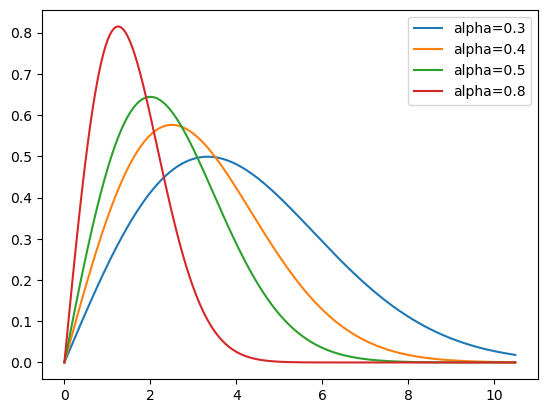

In [2]:
import numpy as np
import matplotlib.pyplot as plt
a0=0.00433  
n1=700 
step=0.015 
aa=1000000 
time=0.00005 
iteration=70000
alpha = [0.3,0.4,0.5,0.8]

for a in alpha:
    x=np.zeros(n1)
    R=np.zeros(n1)
    c=2*np.sqrt(a)**3/np.sqrt(np.sqrt(np.pi))
    
    for i in range(n1):
        x[i]=step*i
        R[i]=c*x[i]*np.exp(-0.5*(a**2)*(x[i]**2))
    plt.plot(x,R,label=f'alpha={str(a)}')
    plt.legend()
    integral = simpson_integral(R**2,x[1]-x[0])
    print(f"valor de la normalització: {integral:.2f}")

valor de la normalització: 1.00
valor de la normalització: 1.00
valor de la normalització: 1.00
valor de la normalització: 1.00
valor de la normalització: 1.00
valor de la normalització: 1.00
valor de la normalització: 1.00
valor de la normalització: 1.00


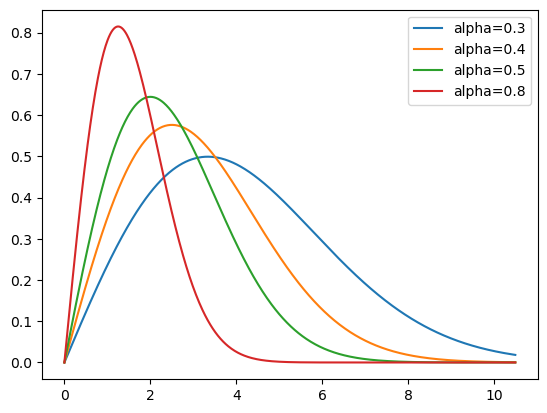

In [3]:
import numpy as np
import matplotlib.pyplot as plt
a0=0.00433  
n1=700 
step=0.015 
aa=1000000 
time=0.00005 
iteration=70000
alpha = [0.3,0.4,0.5,0.8]

for a in alpha:
    x=np.zeros(n1)
    R=np.zeros(n1)
    c=2*np.sqrt(a)**3/np.sqrt(np.sqrt(np.pi))
    for i in range(n1):
        x[i]=step*i
    grid_step = x[1]-x[0]
    for i in range(n1):
        R[i]=c*x[i]*np.exp(-0.5*(a**2)*(x[i]**2))
    normalization = simpson_integral(R ** 2, grid_step)
    R = R / np.sqrt(normalization)
    print(f"valor de la normalització: {normalization:.2f}")
    plt.plot(x,R,label=f'alpha={str(a)}')
    plt.legend()
    integral = simpson_integral(R**2,x[1]-x[0])
    print(f"valor de la normalització: {integral:.2f}")

In [4]:
xprova = np.linspace(0,2*np.pi,1000000000)
step=xprova[1]-xprova[0]
prova_integracio = np.cos(xprova)
simpson_integral(prova_integracio,step)

In [ ]:
from sympy import *

x1=symbols('x')
a1=symbols('a')

expression = ((2*sqrt(a1)**3/sqrt(sqrt(pi)))*a1*exp(-0.5*(a1**2)*(x1**2)))**2
expression



4*a**5*exp(-1.0*a**2*x**2)/sqrt(pi)

In [ ]:
integral=integrate(expression,(x1,-oo,oo))
integral

Piecewise((4.0*a**4, Abs(arg(a)) <= pi/4), (Integral(4*a**5*exp(-1.0*a**2*x**2)/sqrt(pi), (x, -oo, oo)), True))

In [ ]:
import numpy as np
x1 = np.arange(9.0).reshape((3, 3))
print(x1)
x2 = np.arange(9.0).reshape((3, 3))
print(x2)
print(x1 * x2)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[ 0.  1.  4.]
 [ 9. 16. 25.]
 [36. 49. 64.]]


In [22]:
from grosspita import GrossPitaevskiiProblem

problem1 = GrossPitaevskiiProblem(particle_number=10000,grid_size=6, grid_step=0.02, scattering_length=0.00433, sigma=0.5, time_step = 0.0001, iterations=50000, interacting_system= False)
problem2 = GrossPitaevskiiProblem(particle_number=10000,grid_size=6, grid_step=0.02, scattering_length=0.00433, sigma=0.5, time_step = 0.0001, iterations=50000)

In [23]:
import matplotlib.pyplot as plt
import numpy as np


In [24]:
psi1 = problem1.evolution()
psi2 = problem2.evolution()

C:\Users\Usuario\AppData\Local\Temp/ipykernel_13772/1919355872.py:3: RuntimeWarning: invalid value encountered in true_divide
  density = (psi1 /r_vector)**2 * 1/(4*np.pi)
C:\Users\Usuario\AppData\Local\Temp/ipykernel_13772/1919355872.py:4: RuntimeWarning: invalid value encountered in true_divide
  density2 = (psi2 /r_vector)**2 * 1/(4*np.pi)


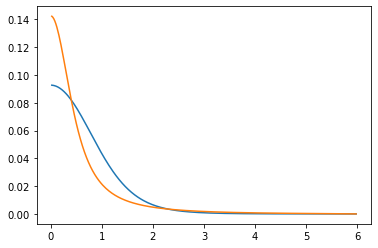

In [25]:
r_vector = np.arange(0., problem1.grid_size, problem1.grid_step)

density = (psi1 /r_vector)**2 * 1/(4*np.pi)
density2 = (psi2 /r_vector)**2 * 1/(4*np.pi)
plt.plot(r_vector,density)
plt.plot(r_vector,density2)

In [26]:
problem.interacting_system

False

C:\Users\Usuario\AppData\Local\Temp/ipykernel_13772/1680328889.py:3: RuntimeWarning: invalid value encountered in true_divide
  density = (psi /r_vector)**2 * 1/(4*np.pi)


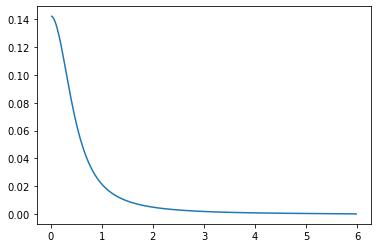

In [15]:

r_vector = np.arange(0., problem.grid_size, problem.grid_step)

density = (psi /r_vector)**2 * 1/(4*np.pi)
plt.plot(r_vector,density)

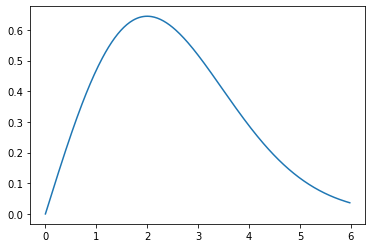

In [7]:
alpha = 0.5
cvar=2*np.sqrt(alpha)**3/np.sqrt(np.sqrt(np.pi))
r_vector = np.arange(0., 6, 0.02)
psi = cvar*r_vector*np.exp(-0.5*(alpha**2)*(r_vector**2))
plt.plot(r_vector,psi)

In [17]:
def density(r_vector,psi):
    return (psi /r_vector)**2 * 1/(4*np.pi)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_2728/3413831555.py:2: RuntimeWarning: invalid value encountered in true_divide
  return (psi /r_vector)**2 * 1/(4*np.pi)


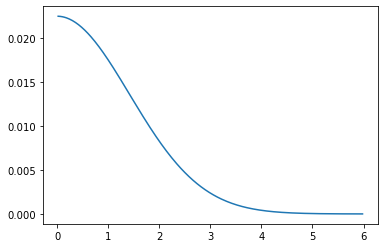

In [18]:
plt.plot(r_vector,density(r_vector,psi))

In [19]:
def second_derivative(f, h):
    derivative = np.zeros(len(f))
    for i, _ in enumerate(f):
        if i == 0:
            derivative[i] = 0
        elif i == len(f) - 1:
            derivative[i] = (f[i - 1] - 2 * f[i]) / (h ** 2)
        else:
            derivative[i] = (f[i + 1] - 2 * f[i] + f[i - 1]) / (h ** 2)
    return derivative

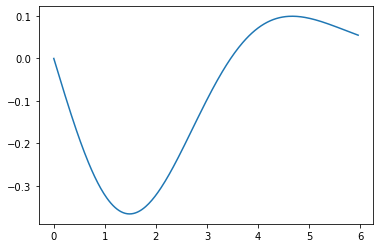

In [23]:
ddpsi = second_derivative(psi,problem.grid_step)

plt.plot(r_vector[:len(r_vector)-1],ddpsi[:len(r_vector)-1])